<a href="https://www.kaggle.com/code/mrafraim/dl-day-3-forward-propagation?scriptVersionId=285098124" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Day 3: Forward Propagation in Neural Networks

Welcome to Day 3!  

### Today’s goals:
1. Understand **forward propagation** in a small network  
2. Perform **manual calculations** for outputs  
3. Implement forward propagation in **NumPy**  
4. Apply **activation functions**: ReLU, Sigmoid, Tanh  

Forward propagation is the process of passing inputs through the network to get predictions.

---


# Recap: Single Neuron Forward Propagation

Forward propagation is simply the step-by-step calculation your neural network performs to turn input → prediction.

For a single neuron:

$$
z = \sum_{i=1}^{n} w_i x_i + b
$$

$$
a = activation(z)
$$

Where:
- $x_i$  = input features  
- $w_i$  = weights  
- $b$ = bias 
- $activation()$ = ReLU, Sigmoid, or Tanh 

Today we will extend this to a 2-layer network.


# Hidden Layer in Deep Learning

In Deep Learning, a hidden layer is any layer of neurons that sits between the input layer and the output layer. It’s called "hidden" because its activations are not directly observed, they are internal computations that transform the data.

## 1. Role of a Hidden Layer

- Extracts features from the input data.
- Enables the network to model non-linear relationships.
- Multiple hidden layers → deep networks, capable of capturing complex patterns.


## 2. How It Works (Mathematical View)

For a single hidden layer:

$$
h = f(Wx + b)
$$

Where:

- $x$ → input vector  
- $W$ → weight matrix connecting input to hidden layer  
- $b$ → bias vector  
- $f$ → activation function (ReLU, sigmoid, tanh, etc.)  
- $h$ → output of hidden layer (input to next layer or output layer)

> Activation functions are critical, they allow non-linearity. Without them, multiple layers would collapse into a single linear transformation.

## 3. Intuition

Hidden layers act as **feature extractors**:

- First layer: detects simple patterns (edges in images, basic features).  
- Second layer: combines these patterns into higher-level features (shapes, motifs).  
- Deeper layers: recognize complex concepts (faces, objects, sequences).


## 4. Example

For a network with 3 input neurons, 2 hidden neurons, and 1 output neuron:

$$
\begin{align}
h_1 &= f(W_1 x + b_1) \\
h_2 &= f(W_2 x + b_2) \\
y &= f_{\text{out}}(V_1 h_1 + V_2 h_2 + c)
\end{align}
$$

Here
* $V_1$ and $V_2$ are the weights connecting the hidden layer to the output layer.
* $h_1$ and $h_2$ are the hidden layer activations.
* $c$ is the bias of the output neuron.
* $f_{\text{out}}$ is the activation function of the output layer (e.g., sigmoid for binary classification, softmax for multi-class, or linear for regression).


# Tiny Network Structure

We will create a network with:

- **2 input features**: $x_1, x_2$
- **1 hidden layer with 2 neurons**: $h_1, h_2$  
- **1 output neuron**: $o_1$  

Weights and biases:

- Hidden layer: 
    - $$h_1: w=[0.2, 0.4], b=0.1$$  
    - $$h_2: w=[0.5, -0.3], b=-0.2$$  
- Output layer: 
    - $$o_1: w=[0.3, -0.2], b=0.05$$  

Activation function for hidden layer: **ReLU**  
Activation function for output layer: **Sigmoid**


# Manual Forward Calculation

### **Input Layer (2 neurons)**
No computations happen inside the input layer.
It just holds the raw data and sends it to the first hidden layer.

* Neuron 1 → holds $x_1$
* Neuron 2 → holds $x_2$

### **Hidden Layer (2 neurons)**

* Neuron $h_1$
* Neuron $h_2$

### **Output Layer (1 neuron)**

* Neuron $o_1$


### Step 1: Hidden layer computation

For neuron h1:

$$
z_{h1} = 0.2 \cdot x_1 + 0.4 \cdot x_2 + 0.1
$$

$$
a_{h1} = ReLU(z_{h1})
$$

For neuron h2:

$$
z_{h2} = 0.5 \cdot x_1 + (-0.3) \cdot x_2 - 0.2
$$

$$
a_{h2} = ReLU(z_{h2})
$$

### Step 2: Output layer

$$
z_{o1} = 0.3 \cdot a_{h1} + (-0.2) \cdot a_{h2} + 0.05
$$

$$
a_{o1} = Sigmoid(z_{o1})
$$


# Define Activation Functions (Code)

In [1]:
import numpy as np

# ReLU
def relu(x):
    return np.maximum(0, x)

# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Tanh
def tanh(x):
    return np.tanh(x)


# Forward Propagation with NumPy (Code)

In [2]:
# Inputs
x = np.array([1.0, 2.0])

# Hidden layer weights and biases
W_hidden = np.array([[0.2, 0.4],   # h1 weights
                     [0.5, -0.3]]) # h2 weights
b_hidden = np.array([0.1, -0.2])   # h1, h2 biases

# Output layer weights and bias
W_output = np.array([0.3, -0.2])   # o1 weights
b_output = 0.05

# Forward pass: Hidden layer
z_hidden = np.dot(W_hidden, x) + b_hidden
a_hidden = relu(z_hidden)

# Forward pass: Output layer
z_output = np.dot(W_output, a_hidden) + b_output
a_output = sigmoid(z_output)

print("Hidden layer pre-activation:", z_hidden)
print("Hidden layer activation:", a_hidden)
print("Output layer pre-activation:", z_output)
print("Output layer activation (prediction):", a_output)


Hidden layer pre-activation: [ 1.1 -0.3]
Hidden layer activation: [1.1 0. ]
Output layer pre-activation: 0.38
Output layer activation (prediction): 0.5938731029341427


# Forward Propagation with Different Activations (Code)

In [3]:
# Try Tanh for hidden layer
a_hidden_tanh = tanh(z_hidden)
z_output_tanh = np.dot(W_output, a_hidden_tanh) + b_output
a_output_tanh = sigmoid(z_output_tanh)

print("Hidden layer activation (Tanh):", a_hidden_tanh)
print("Output layer activation with Tanh hidden:", a_output_tanh)

Hidden layer activation (Tanh): [ 0.80049902 -0.29131261]
Output layer activation with Tanh hidden: 0.5862324957112643


# Visualizing Hidden Layer Activations

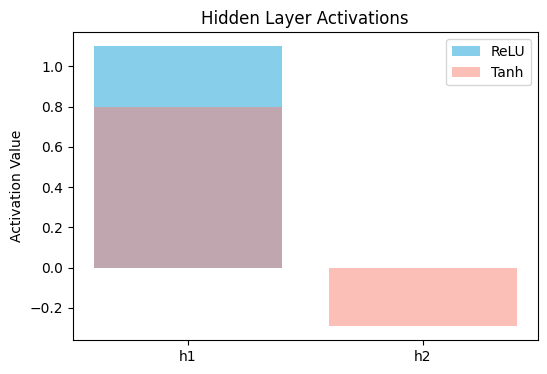

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

plt.bar(['h1', 'h2'], a_hidden, color='skyblue', label='ReLU')
plt.bar(['h1', 'h2'], a_hidden_tanh, color='salmon', alpha=0.5, label='Tanh')

plt.title("Hidden Layer Activations")
plt.ylabel("Activation Value")
plt.legend()
plt.show()

### Interpretation

* **ReLU → sparse representation**
  Only “strong positive” neurons fire.
  More efficient, easier optimization, but can kill neurons.

* **Tanh → dense representation**
  All neurons express something (positive or negative).
  More nuance but harder to train.

**Your visualization shows this feature-level behavior clearly:**

- h1 is a strong feature → both activations use it
- h2 is weak/negative →

     * ReLU ignores it
     * Tanh uses it

This difference is why the final predictions are slightly different:

```
ReLU: 0.5939
Tanh: 0.5862
```

ReLU produces a stronger output because it lets h1 remain large.

# Key Takeaways from Day 3

1. Forward propagation = passing inputs through layers to get output  
2. Hidden layers compute: $a = activation(\sum w_i x_i + b)$  
3. Output layer applies activation (e.g., Sigmoid) for final prediction  
4. Choice of activation function affects neuron output: ReLU, Sigmoid, Tanh  
5. Manual calculation + NumPy implementation helps build strong intuition

---